Import libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Read csv-file with Data Set

In [22]:
df1 = pd.read_csv('csv_result-php50jXam.csv',index_col=0)

In [23]:
df1

,V1,V2,V3,V4,Class
id,,,,,
1,3.62160,8.66610,-2.8073,-0.44699,1
2,4.54590,8.16740,-2.4586,-1.46210,1
3,3.86600,-2.63830,1.9242,0.10645,1
4,3.45660,9.52280,-4.0112,-3.59440,1
5,0.32924,-4.45520,4.5718,-0.98880,1
...,...,...,...,...,...
1368,0.40614,1.34920,-1.4501,-0.55949,2
1369,-1.38870,-4.87730,6.4774,0.34179,2
1370,-3.75030,-13.45860,17.5932,-2.77710,2


Build a plot to visualize relationship between pairs of variables

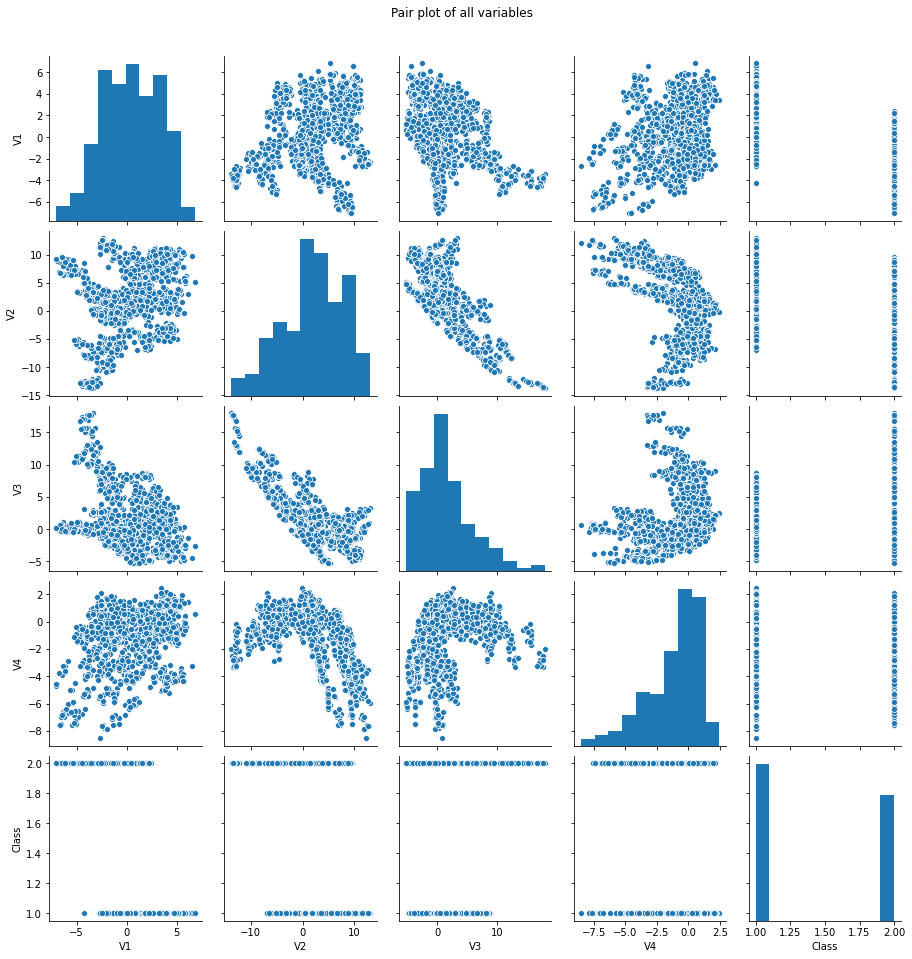

In [24]:
g=sns.pairplot(df1)
g.fig.suptitle("Pair plot of all variables", y=1.05)
plt.savefig('pairplot.jpg')

Since variables have different scales we need to standardize them

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1.drop('Class',axis=1))

StandardScaler()

In [26]:
scaled_features=scaler.transform(df1.drop('Class', axis=1))

After standardizing and fitting scaled variables look like

In [27]:
scaled_features

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

As soon as we have several variables they should be transformed into 2 principal components

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)

Form final Data Set where PC 1 and PC 2 are X and Class is Y

In [30]:
principalDF = pd.DataFrame(data=principalComponents,columns=['PC 1', 'PC 2'])
finalDF = pd.concat([principalDF,df1['Class']],axis=1)

In [31]:
finalDF['Class']

0       NaN
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1368    2.0
1369    2.0
1370    2.0
1371    2.0
1372    2.0
Name: Class, Length: 1373, dtype: float64

NaN values should be removed

In [32]:
finalDF.dropna(inplace=True)
finalDF

,PC 1,PC 2,Class
1,-1.639441,-1.093812,1.0
2,0.513919,-1.324880,1.0
3,-2.310952,-0.202514,1.0
4,1.193416,0.024654,1.0
5,-2.319123,-0.572343,1.0
...,...,...,...
1367,-0.221995,-0.290458,2.0
1368,1.909395,0.142149,2.0
1369,4.049327,2.036023,2.0
1370,3.019617,1.392140,2.0


Divide data into train and test 

In [41]:
from sklearn.model_selection import train_test_split
X=finalDF.drop('Class',axis=1)
y=finalDF['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

Use K-means method to divide data to 2 clusters 

In [43]:
from sklearn.cluster import KMeans
km_res = KMeans(n_clusters=2)
km_res.fit(X_train)
pred = km_res.predict(X_test)

Find cluster centers

In [44]:
km_res.cluster_centers_

array([[ 1.12930852, -0.29308984],
       [-1.18163794,  0.32640002]])

Vizualize data with scatter plot. Show cluster centers

In [36]:
clusters = km_res.cluster_centers_

Text(0.7, 3.4, 'Class 1 - yellow, Class 2 - purple')

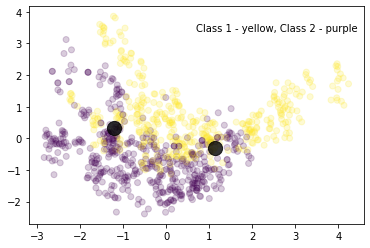

In [51]:
plt.scatter(X_train['PC 1'],X_train['PC 2'], c=y_train, cmap='viridis',alpha=0.2)
plt.scatter(clusters[:,0],clusters[:,1],s=200,c='black',alpha=0.8)
plt.text(0.7,3.4,'Class 1 - yellow, Class 2 - purple')

Text(0.7, 3.4, 'Class 1 - yellow, Class 2 - purple')

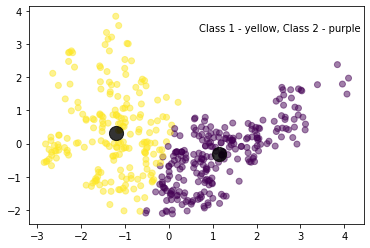

In [50]:
plt.scatter(X_test['PC 1'],X_test['PC 2'], c=pred,cmap='viridis',alpha=0.5)
plt.scatter(clusters[:,0],clusters[:,1],s=200,c='black',alpha=0.8)
plt.text(0.7,3.4,'Class 1 - yellow, Class 2 - purple')